In [1]:
import os
from joblib import Parallel, delayed
import time
import numpy as np

In [2]:
# time.sleep(30)

In [3]:
with open('all_external_ips') as f:
    lines = f.read().splitlines()


lines = [x for x in lines if x!='None']
lines

for ip in lines:
    if ip!='None':
        current = (ip.split('.'))

        print('ssh -i "MAKWest.pem" ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com')

ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com


## Set number of clusters

In [4]:
nclusters = 0

for folder in os.listdir('.'):
    if 'config' in folder and folder!='config':
        nclusters = nclusters + 1
        
        
print(nclusters)


total_count = 8


nreplicas = int(total_count/nclusters)
nodeIps = lines[:nclusters* nreplicas]

nclients = 2

# no_cluster_yet_nodes = lines[nclusters* nreplicas:-(nclusters)]
no_cluster_yet_nodes = lines[nclusters* nreplicas:-nclients]




# clientIps = lines[-(nclusters):]
clientIps = lines[-nclients:]



2


In [5]:
clientIps, no_cluster_yet_nodes

(['127.0.0.1', '127.0.0.1'], [])

## Functions

In [6]:
def setup(i):

    ip = lines[i]
    if ip!='None':
        current = (ip.split('.'))
        command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'commands.sh'+' ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:commands.sh'
        
        
        os.system(command)

        
def compile_job(i):
    ip = lines[i]
    if ip!='None':
        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S ./gradlew installDist'
        
        
        os.system(command)

        
        
def clean_job(i):
    ip = lines[i]
    
#     rm_command = 'sudo rm config/currentView; '
#     for iter_ in range(nclusters):
#         rm_command = rm_command + 'rm config'+str(iter_)+'/currentView; '
        
    
    if ip!='None':
        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S rm ../dump_files/nohup*.out; echo 1234 | sudo -S rm config*/currentView;'
        
        
        os.system(command)
        
        

        
def run_server_node(i):
    ip = lines[i]
#     if ip!='None' and( ip in nodeIps or ip in no_cluster_yet_nodes):
    if ip!='None' and( ip in nodeIps):
        
        current = (ip.split('.'))
        command = 'nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../dump_files/nohup_s'+str(i)+'.out 2>&1 & echo $! > ../dump_files/jobID_s'+str(i)+'.txt'
        
        
        os.system(command)
        
        
        
    if ip!='None' and( ip in no_cluster_yet_nodes):
        
        current = (ip.split('.'))
        command = 'nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../dump_files/nohup_s'+str(i)+'.out 2>&1 &'
        
        
        os.system(command)        
#         print(command)



def run_basic_client(i):
    cmd_arg = ''
    
    ip = lines[i]
    if ip!='None' and ip in clientIps:
#     if ip!='None' and ip in nodeIps[1:1+len(clientIps)]:
        
        current = (ip.split('.'))
        
#         cmd_arg = nodeIps[1:1+len(clientIps)].index(ip)
        
        for iter__ in range(len(clientIps)):
            if ip==clientIps[iter__]:
                cmd_arg = iter__
                
                
        
#         print(i, cmd_arg)
            
        current = (ip.split('.'))
        command = 'nohup ./runscripts/ycsbClient.sh '+str(i-len(nodeIps)-len(no_cluster_yet_nodes))+' >../dump_files/nohup_c'+str(i)+'.out 2>&1 &'

        
        os.system(command)


def kill_java(i):
    ip = lines[i]
    
    if ip!='None':
        current = (ip.split('.'))
        command = ' killall java; killall nohup'
        
        
        os.system(command)
        
        
        
def kill_clients(i):
    ip = lines[i]
    if ip!='None' and ip in clientIps:
        current = (ip.split('.'))
        command = 'killall java;  killall nohup"'
        
        
        os.system(command)

def run_server_node_check(i):
    ip = lines[i]
#     if ip!='None' and( ip in nodeIps or ip in no_cluster_yet_nodes):
    if ip!='None' and( ip in nodeIps):
        
        current = (ip.split('.'))
        command = ' nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../dump_files/nohup_s'+str(i)+'.out 2>&1 &'
        
        
        print(command)
        
        

# for i in range(len(lines)):
#     run_server_node_check(i)

def run_basic_client_check(i):
    cmd_arg = ''
    
    ip = lines[i]
    if ip!='None' and ip in clientIps:
        
        for iter__ in range(len(clientIps)):
            if ip==clientIps[iter__]:
                cmd_arg = iter__
                
                
        
#         print(i, cmd_arg)
            
        current = (ip.split('.'))
        command = 'nohup ./runscripts/ycsbClient.sh '+str(cmd_arg)+' >../dump_files/nohup_c'+str(i)+'.out 2>&1 &'

        
        print(command)

# for i in range(len(lines)):
#     run_basic_client_check(i)



def join_node1(i):
    ip = lines[i]
    if ip!='None':
        
        current = (ip.split('.'))
        command = 'nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices '+str(i)+' 127.0.0.1 11080 11081 config0 >../dump_files/nohup_j'+str(i)+'.out 2>&1 &'
        
        
        os.system(command)   
        
        
def join_node2(i):
    ip = lines[i]
    if ip!='None':
        
        current = (ip.split('.'))
        command = 'nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices '+str(i)+' 127.0.0.1 11090 11091 config0 >../dump_files/nohup_j'+str(i)+'.out 2>&1 &'
        
        
        os.system(command) 
        
def join_node3(i):
    ip = lines[i]
    if ip!='None':
        
        current = (ip.split('.'))
        command = 'nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices '+str(i)+' 127.0.0.1 11100 11101 config0 >../dump_files/nohup_j'+str(i)+'.out 2>&1 &'
        
        
        os.system(command) 

## Compile Job

## Setup Client and nodeIPS

In [7]:
len(lines)

10

In [8]:
len(nodeIps), len(clientIps)

(8, 2)

## RUN SERVERS

In [9]:
for i in range(len(lines)):
    kill_java(i)

for i in range(len(lines)):
    clean_job(i)
    
compile_job(1)



java(3709): Operation not permitted
java(4212): Operation not permitted
java(4257): Operation not permitted
java(4308): Operation not permitted
java: no process found
nohup: no process found
java(3709): Operation not permitted
java(4212): Operation not permitted
java(4257): Operation not permitted
java(4308): Operation not permitted
java: no process found
nohup: no process found
java(3709): Operation not permitted
java(4212): Operation not permitted
java(4257): Operation not permitted
java(4308): Operation not permitted
java: no process found
nohup: no process found
java(3709): Operation not permitted
java(4212): Operation not permitted
java(4257): Operation not permitted
java(4308): Operation not permitted
java: no process found
nohup: no process found
java(3709): Operation not permitted
java(4212): Operation not permitted
java(4257): Operation not permitted
java(4308): Operation not permitted
java: no process found
nohup: no process found
java(3709): Operation not permitted
java(4212


> Task :compileJava

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar


Note: /home/tejas/work/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.


> Task :installDist

BUILD SUCCESSFUL in 3s
3 actionable tasks: 3 executed


In [10]:
    
for i in range(len(lines)-nclients-len(no_cluster_yet_nodes)):
    print(i)
    run_server_node(i)

0
1
2
3
4
5
6
7


In [11]:
time.sleep(30)
!tail ../dump_files/nohup_s0.out -n 50

-- Received 2 replies for query ID 5
-- <-- receiving, msg:bftsmart.statemanagement.standard.StandardSMMessage@3ac35b with it being OtherClusterMessage=false
-- currentConsensusIdReceived activated
-- Received  CID reply from replica ( or smsg.getSender()) 2 with smsg.getCID() 5 (expecting queryID 5),  waitingCID -1, isInitializing true
-- smsg.getSender() 2, smsg.getState().getLastCID() -1
-- Received 3 replies for query ID 5
-- Received quorum of replies for query ID 5, replies.size(): 3
-- CID -1 came from 3 replicas with quorum 2
-- There is a quorum for CID -1 with lastCID -1
-- Replica state is up to date
-- 
		###################################
		    Ready to process operations    
		###################################
-- zsdqwd Before the prewait
-- <-- receiving, msg:bftsmart.statemanagement.standard.StandardSMMessage@1df4d85d with it being OtherClusterMessage=false
-- currentConsensusIdAsked activated
-- Received CID query from 2 with ID 4
-- Going to send back response to C

In [12]:


# for i in range(len(lines)):
#     kill_java(i)

In [13]:
len(nodeIps)+len(no_cluster_yet_nodes)+len(clientIps)


10

## Run basic client

In [14]:
for i in range(len(nodeIps)+len(no_cluster_yet_nodes),len(nodeIps)+len(no_cluster_yet_nodes)+len(clientIps)):
    run_basic_client(i)

In [15]:
time.sleep(150)

In [16]:

# time.sleep(30)
# run_server_node(8)
# time.sleep(15)
# join_node1(8)

# time.sleep(30)
# run_server_node(9)

# time.sleep(30)
# join_node2(9)

# time.sleep(30)
# run_server_node(10)
# time.sleep(30)
# join_node3(10)

In [17]:
# time.sleep(50)

# run_server_node(9)

# time.sleep(160)
# join_node2(9)


# for i in [2]:
#     os.system('kill -9 `cat ../dump_files/jobID_s2.txt`')
    


# time.sleep(80)



for i in range(len(lines)):
    kill_java(i)
    


java(3709): Operation not permitted
java(4212): Operation not permitted
java(4257): Operation not permitted
java(4308): Operation not permitted
nohup: no process found
java(3709): Operation not permitted
java(4212): Operation not permitted
java(4257): Operation not permitted
java(4308): Operation not permitted
nohup: no process found
java(3709): Operation not permitted
java(4212): Operation not permitted
java(4257): Operation not permitted
java(4308): Operation not permitted
nohup: no process found
java(3709): Operation not permitted
java(4212): Operation not permitted
java(4257): Operation not permitted
java(4308): Operation not permitted
nohup: no process found
java(3709): Operation not permitted
java(4212): Operation not permitted
java(4257): Operation not permitted
java(4308): Operation not permitted
nohup: no process found
java(3709): Operation not permitted
java(4212): Operation not permitted
java(4257): Operation not permitted
java(4308): Operation not permitted
nohup: no proces

In [18]:
# for i in range(len(lines)):
#     kill_java(i)

## Main Job

In [19]:

def getTimesThputs(file):
    f = open(file, "r")
    data = f.readlines() 
    times = []
    thputs = []
    latencies = []
    for line in data:
#         print(line)
        if not line.startswith('--') and 'current ops/sec; ' in line and 'AverageLatency(us)=' in line and not 'JVM' in line:

#         print(line)
            times.append(line.split('sec:')[0].strip())
            thputs.append(line.split(';')[1].split('current')[0].strip())


            read_lat = '0'
            write_lat = '0'

            if ('READ AverageLatency' in line):

                print(line)

                read_lat = line.split('READ AverageLatency(us)=')[1].split(']')[0].strip()


            if ('UPDATE AverageLatency' in line):                    

                write_lat = line.split('UPDATE AverageLatency(us)=')[1].split(']')[0].strip()


            if (('READ AverageLatency' not in line) and ('UPDATE AverageLatency' not in line)):
                latencies.append(line.split('=')[1].split(']')[0].strip())
            else:
                read_frac = 0
                write_frac = 0

                if float(read_lat) > 0:
                    read_frac = 0.85

                if float(write_lat) > 0:
                    write_frac = 0.15

#                         print(line, write_frac, read_frac, float(read_lat), float(write_lat))

                lat = str( (write_frac * float(write_lat) +\
                            read_frac*float(read_lat))/(write_frac+read_frac)\
                         )
                latencies.append(lat)

            print(line,latencies[-1],thputs[-1],times[-1])

    return np.array(times).astype(float), np.array(thputs).astype(float), np.array(latencies).astype(float)/1e6  


In [20]:
## Byzantine Remote View Change

In [21]:
times ,thputs, lats = getTimesThputs('../dump_files/nohup_c'+str(len(nodeIps)+len(no_cluster_yet_nodes))+'.out')
times2 ,thputs2, lats = getTimesThputs('../dump_files/nohup_c'+str(len(nodeIps)+len(no_cluster_yet_nodes)+1)+'.out')


'../dump_files/nohup_c'+str(len(nodeIps)+len(no_cluster_yet_nodes))+'.out'

 3 sec: 55 operations; 55 current ops/sec; [READ AverageLatency(us)=144833.8] 

 3 sec: 55 operations; 55 current ops/sec; [READ AverageLatency(us)=144833.8] 
 144833.8 55 3
 4 sec: 73 operations; 17.87 current ops/sec; [READ AverageLatency(us)=51465.06] 

 4 sec: 73 operations; 17.87 current ops/sec; [READ AverageLatency(us)=51465.06] 
 51465.06 17.87 4
 5 sec: 106 operations; 32.97 current ops/sec; [READ AverageLatency(us)=43946] [UPDATE AverageLatency(us)=1763875.38] 

 5 sec: 106 operations; 32.97 current ops/sec; [READ AverageLatency(us)=43946] [UPDATE AverageLatency(us)=1763875.38] 
 301935.40699999995 32.97 5
 6 sec: 163 operations; 56.89 current ops/sec; [READ AverageLatency(us)=49908] [UPDATE AverageLatency(us)=658301.57] -- Receiving reply from 3 with reqId:2. Putting on pos=3

 6 sec: 163 operations; 56.89 current ops/sec; [READ AverageLatency(us)=49908] [UPDATE AverageLatency(us)=658301.57] -- Receiving reply from 3 with reqId:2. Putting on pos=3
 141167.0355 56.89 6
 7 sec

 3 sec: 6 operations; 5.99 current ops/sec; [READ AverageLatency(us)=886123.67] 

 3 sec: 6 operations; 5.99 current ops/sec; [READ AverageLatency(us)=886123.67] 
 886123.67 5.99 3
 4 sec: 48 operations; 41.71 current ops/sec; [READ AverageLatency(us)=89431.62] 

 4 sec: 48 operations; 41.71 current ops/sec; [READ AverageLatency(us)=89431.62] 
 89431.62 41.71 4
 5 sec: 80 operations; 31.97 current ops/sec; [READ AverageLatency(us)=42583.78] [UPDATE AverageLatency(us)=1231851.33] 

 5 sec: 80 operations; 31.97 current ops/sec; [READ AverageLatency(us)=42583.78] [UPDATE AverageLatency(us)=1231851.33] 
 220973.9125 31.97 5
 6 sec: 156 operations; 75.92 current ops/sec; [READ AverageLatency(us)=37652.39] [UPDATE AverageLatency(us)=481624.8] 

 6 sec: 156 operations; 75.92 current ops/sec; [READ AverageLatency(us)=37652.39] [UPDATE AverageLatency(us)=481624.8] 
 104248.2515 75.92 6
 7 sec: 185 operations; 28.94 current ops/sec; [READ AverageLatency(us)=40412.5] [UPDATE AverageLatency(us)=92

'../dump_files/nohup_c8.out'

In [22]:
# times - times2

In [23]:
# thputs = thputs + thputs2

In [24]:
# np.mean(lats[20:]) # 23604.83205128205

In [25]:
np.mean(lats[20:])

0.033896340868

In [26]:
lats

array([0.88612367, 0.08943162, 0.22097391, 0.10424825, 0.1737843 ,
       0.29060013, 0.2403677 , 0.2589702 , 0.23463513, 0.11156296,
       0.11748994, 0.10197541, 0.14541033, 0.10832446, 0.06830409,
       0.08776043, 0.16286087, 0.20320637, 0.12173305, 0.11014289,
       0.06980864, 0.08029409, 0.11275817, 0.07480715, 0.09534968,
       0.07446194, 0.08077792, 0.07667159, 0.07036074, 0.0653271 ,
       0.04628116, 0.05530762, 0.05149996, 0.06742787, 0.11124546,
       0.11338372, 0.10939417, 0.08919914, 0.05316356, 0.0364889 ,
       0.05375773, 0.03941212, 0.03472411, 0.0436526 , 0.03914309,
       0.03569318, 0.05543001, 0.04470204, 0.04015743, 0.05863905,
       0.07869843, 0.03978578, 0.04079078, 0.04735553, 0.03376418,
       0.02801811, 0.05346097, 0.03459961, 0.06808001, 0.05681113,
       0.03737712, 0.03315906, 0.04282828, 0.03239251, 0.02825614,
       0.02830422, 0.0203318 , 0.02953919, 0.02549879, 0.02103165,
       0.05375518, 0.03494391, 0.02890075, 0.02595622, 0.02167

In [27]:
# import pylab as pl

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Throughput')

# # pl.axvline(FailTimes[0], label = '1st fail', ls = '--', color = 'r')
# # pl.axvline(FailTimes[1], label = '2nd fail', ls = '--', color = 'g')
# # pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# # pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# # pl.savefig('../Experiments/RemoteViewChange.png', dpi = 150)
# pl.show()
# pl.clf()


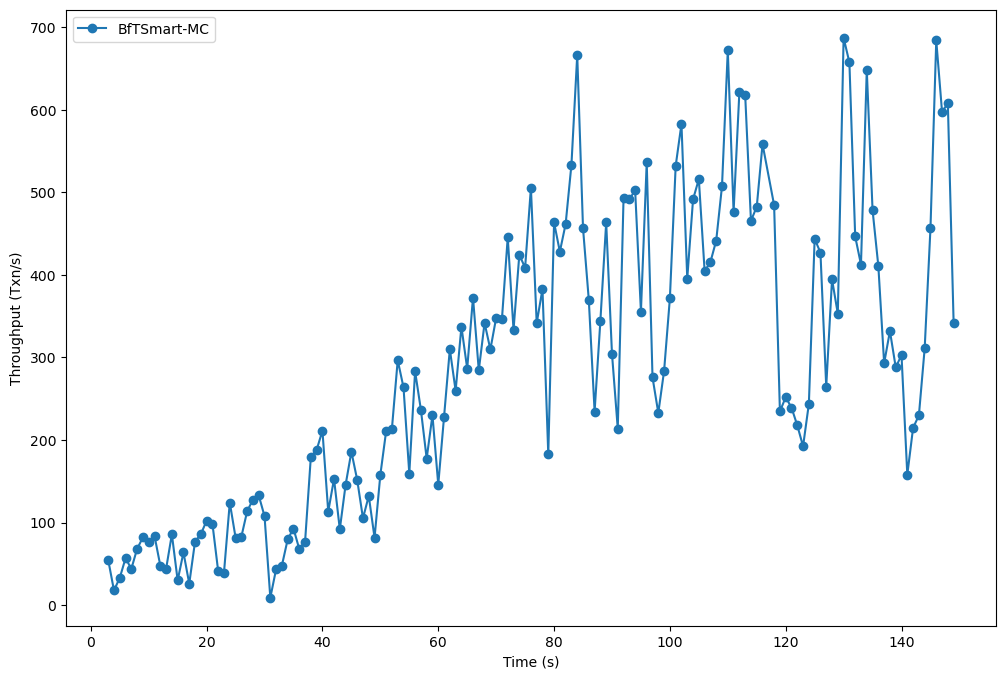

<Figure size 640x480 with 0 Axes>

In [28]:
import pylab as pl

pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
pl.plot(times[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Joins Throughput')

# pl.axvline(FailTimes[0], label = '1st fail', ls = '--', color = 'r')
# pl.axvline(FailTimes[1], label = '2nd fail', ls = '--', color = 'g')
# pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

pl.xlabel('Time (s)')
pl.ylabel('Throughput (Txn/s)')
pl.legend()
# pl.savefig('../Experiments/RemoteViewChange.png', dpi = 150)
pl.show()
pl.clf()


In [29]:
(thputs), np.sum(thputs)

(array([ 55.  ,  17.87,  32.97,  56.89,  43.96,  68.25,  81.95,  76.85,
         83.92,  47.95,  43.91,  85.74,  29.94,  63.87,  25.95,  76.92,
         85.83, 102.39,  98.8 ,  40.92,  39.45, 124.25,  81.84,  82.83,
        113.77, 127.87, 132.87, 107.78,   8.98,  43.56,  47.95,  79.68,
         92.81,  67.93,  76.69, 179.82, 188.06, 211.31, 113.32, 152.85,
         91.91, 145.71, 185.81, 151.85, 105.26, 132.34,  81.67, 157.84,
        210.79, 213.79, 296.7 , 263.74, 159.36, 283.3 , 236.76, 177.58,
        230.08, 146.  , 227.54, 310.  , 259.74, 337.31, 286.43, 372.63,
        284.44, 341.85, 309.69, 348.  , 346.65, 445.55, 333.33, 424.45,
        408.59, 505.48, 341.66, 382.85, 182.82, 463.54, 428.14, 461.77,
        533.47, 666.33, 456.54, 369.63, 234.53, 344.66, 463.54, 304.7 ,
        213.79, 493.51, 491.51, 502.5 , 355.64, 536.46, 276.  , 232.77,
        283.72, 371.63, 532.  , 582.83, 395.6 , 491.51, 516.  , 404.6 ,
        415.58, 441.56, 507.49, 672.  , 476.52, 621.38, 618.38, 

In [30]:
# import pylab as pl

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Joins Throughput')

# # pl.axvline(FailTimes[0], label = '1st fail', ls = '--', color = 'r')
# # pl.axvline(FailTimes[1], label = '2nd fail', ls = '--', color = 'g')
# # pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# # pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# # pl.savefig('../Experiments/RemoteViewChange.png', dpi = 150)
# pl.show()
# pl.clf()
